In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing_data = fetch_california_housing()

# Create a DataFrame with proper column names
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df['MedHouseVal'] = housing_data.target

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Shape: (20640, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
mi

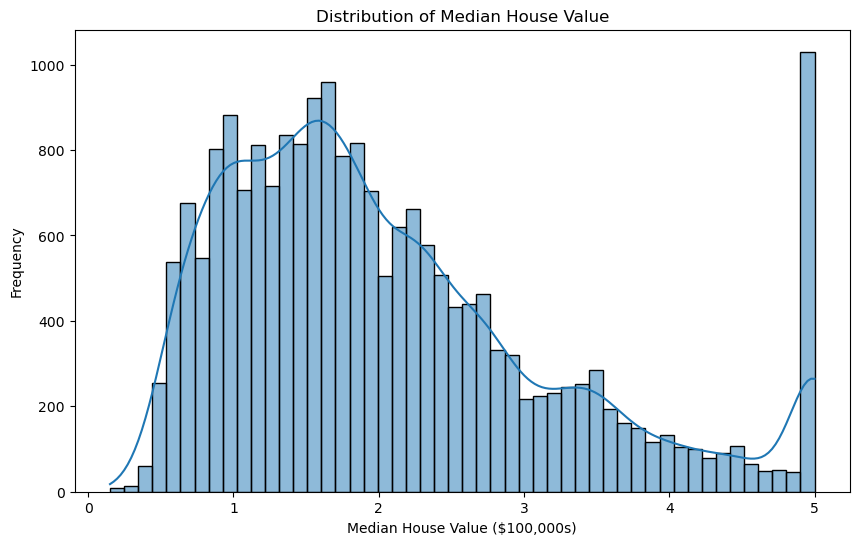

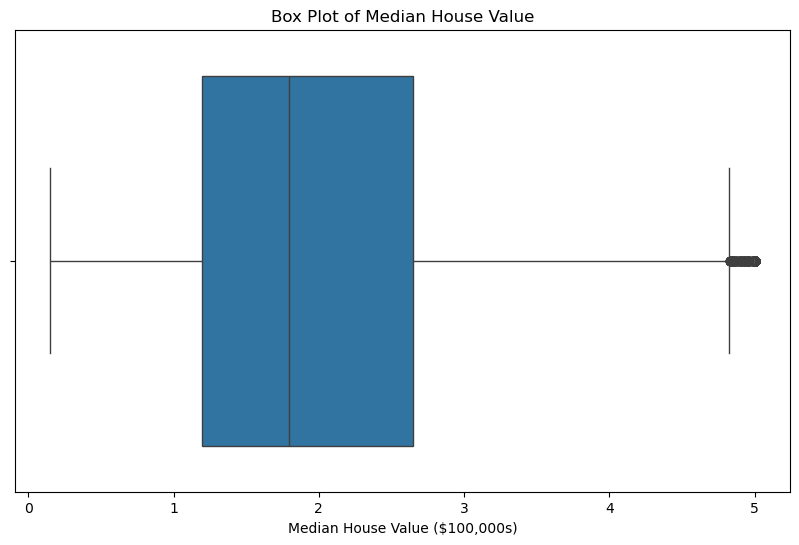

In [5]:
# Distribution of MedHouseVal
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

# Box plot of MedHouseVal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MedHouseVal'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.show()

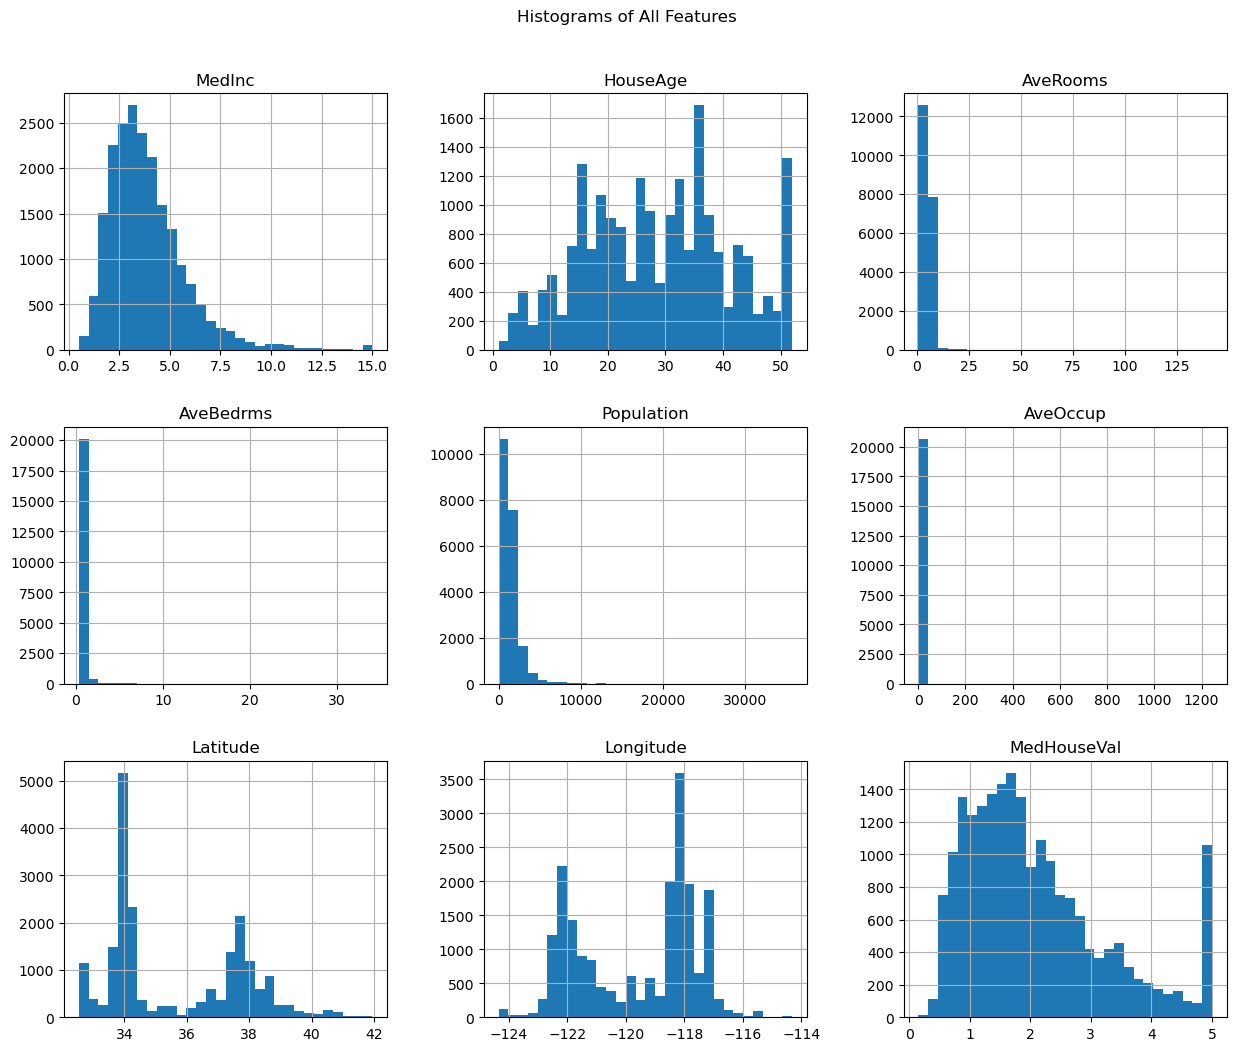

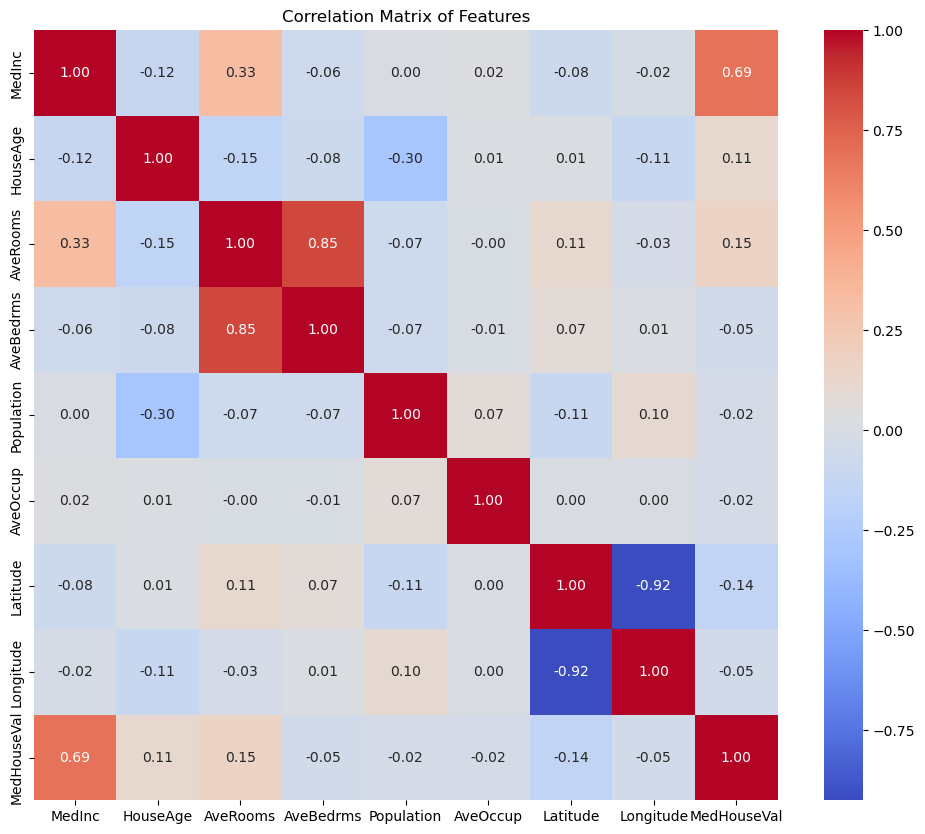

In [6]:
# Individual feature distributions
df.hist(figsize=(15, 12), bins=30)
plt.suptitle('Histograms of All Features', y=0.95)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

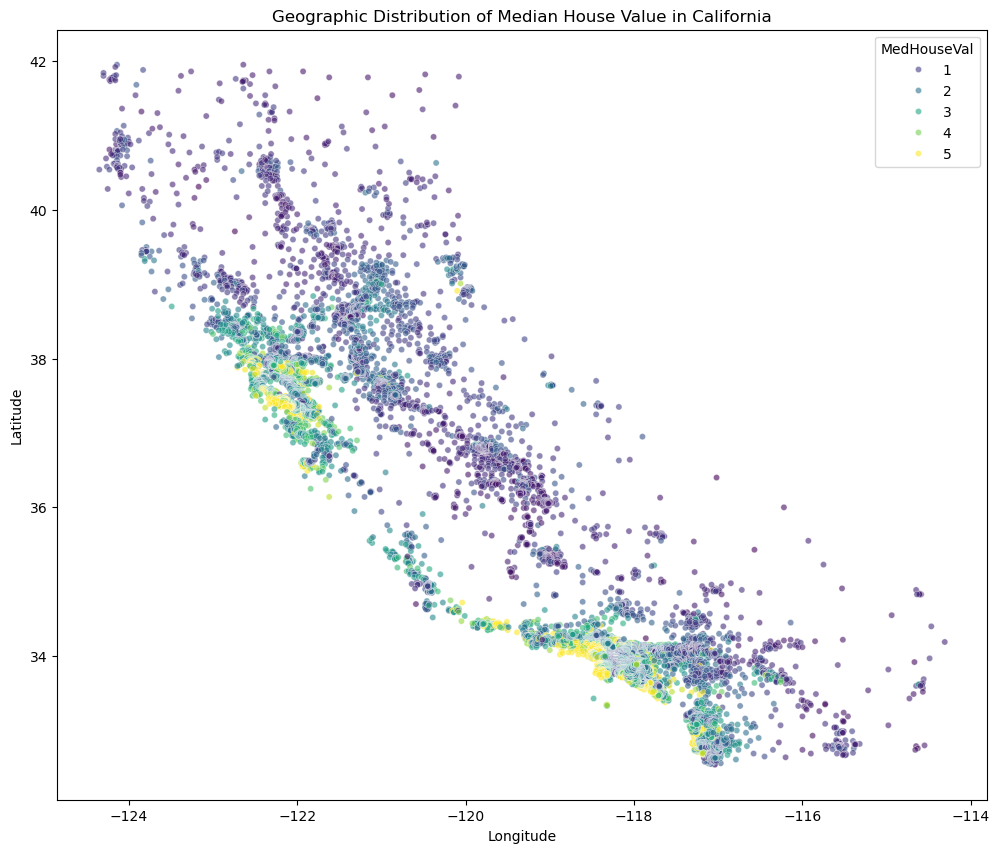

In [7]:
# Scatter plot of Latitude vs Longitude colored by MedHouseVal
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='MedHouseVal',
    palette='viridis',
    s=20,
    alpha=0.6
)
plt.title('Geographic Distribution of Median House Value in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Top 3 features most correlated with MedHouseVal:
 Index(['MedInc', 'AveRooms', 'HouseAge'], dtype='object')


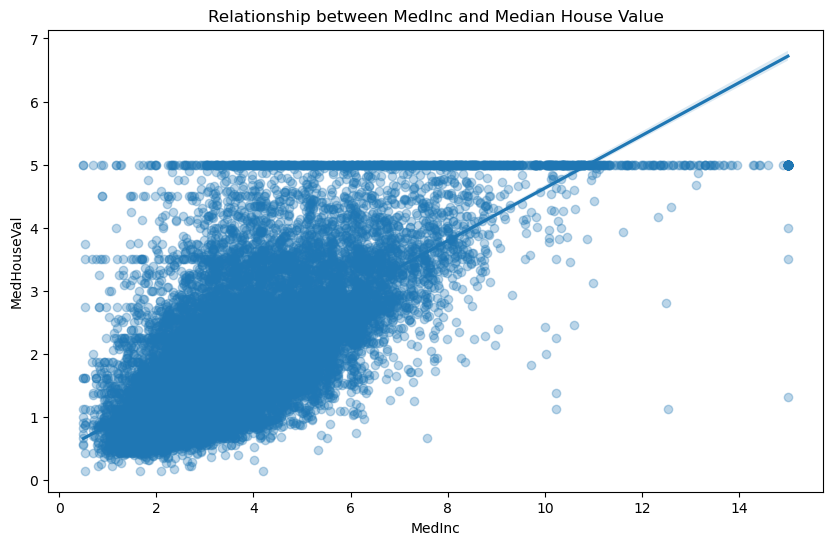

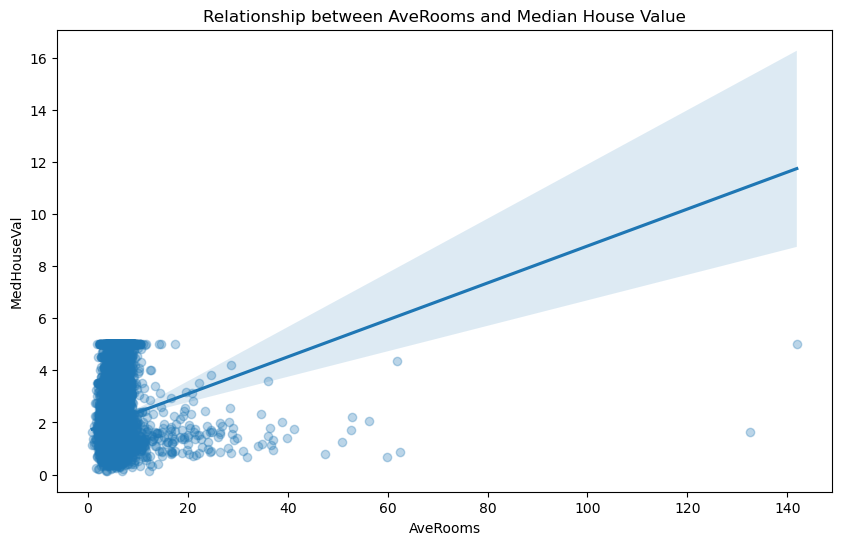

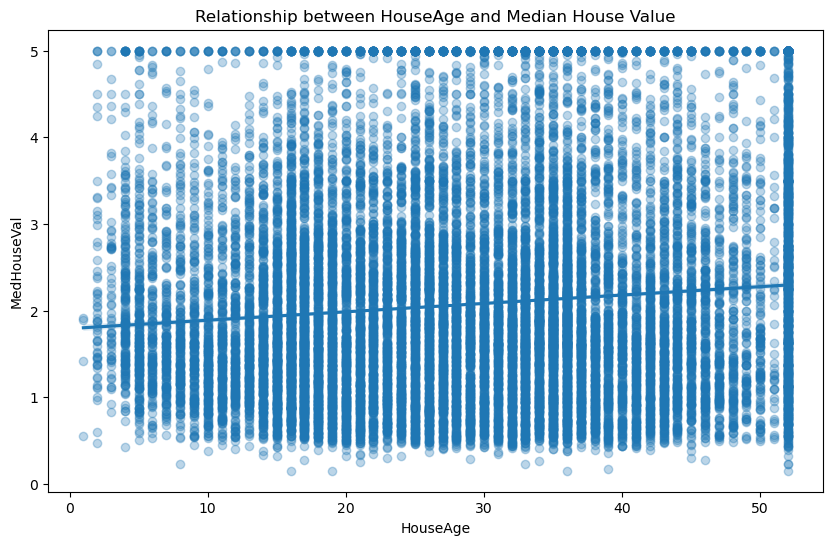

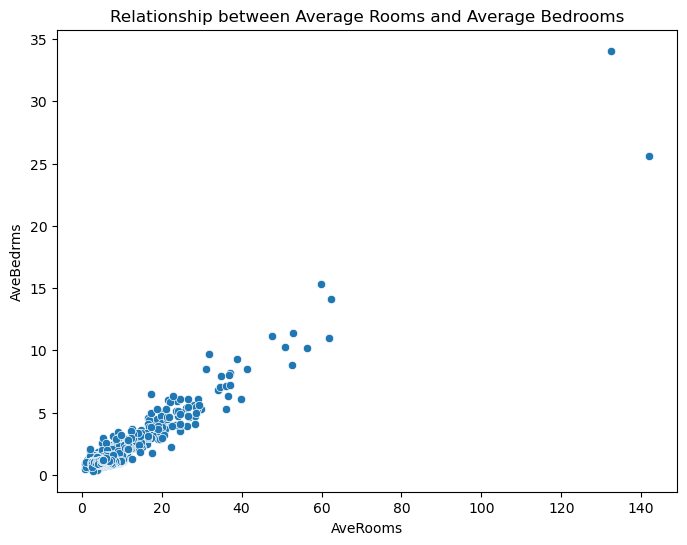

In [8]:
# Identify top 3 correlations with target
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
top_3_features = correlations[1:4].index
print("Top 3 features most correlated with MedHouseVal:\n", top_3_features)

# Scatter plots with trend lines for these relationships
for feature in top_3_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature, y='MedHouseVal', data=df, scatter_kws={'alpha':0.3})
    plt.title(f'Relationship between {feature} and Median House Value')
    plt.show()

# Example: Analysis of multicollinearity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AveRooms', y='AveBedrms')
plt.title('Relationship between Average Rooms and Average Bedrooms')
plt.show()

**While the histogram shows the median value among all the houses, the box plot is a lot easier to decipher as a significant number of homes within the values around $120k and $260k.**

**It's intriguing that most of the homes are 15 years or older; whether they fit in the median price range is a different matter. However, the correlation matrix seems to make sense where the median household income is a logical way to estimate the value of the home (and vice versa).**

**The geographic chart makes sense where most of the homes above $300k are along the coast, while the inland homes are more affordable. However, some of the modeling could be tricky if we're trying to identify newer homes that fit in a certain price range, especially if we're also trying to find those with a certain number of bedrooms.**

In [9]:
#PART 2.1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing_data = fetch_california_housing()

# Create a DataFrame with proper column names
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df['MedHouseVal'] = housing_data.target

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Document your decision-making
# In this dataset, there are no missing values. Therefore, no action is needed
# for missing value imputation. This is a crucial check, as in most real-world
# datasets, missing values would need to be addressed through imputation
# (e.g., with the mean, median, or a more advanced method) or removal.

Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


--- IQR Method Outlier Analysis ---
IQR Outlier Counts per Feature:
 MedInc          681
HouseAge          0
AveRooms        511
AveBedrms      1424
Population     1196
AveOccup        711
MedHouseVal    1071
dtype: int64

Original size: 20640
IQR cleaned size: 16312
Rows removed by IQR method: 4328


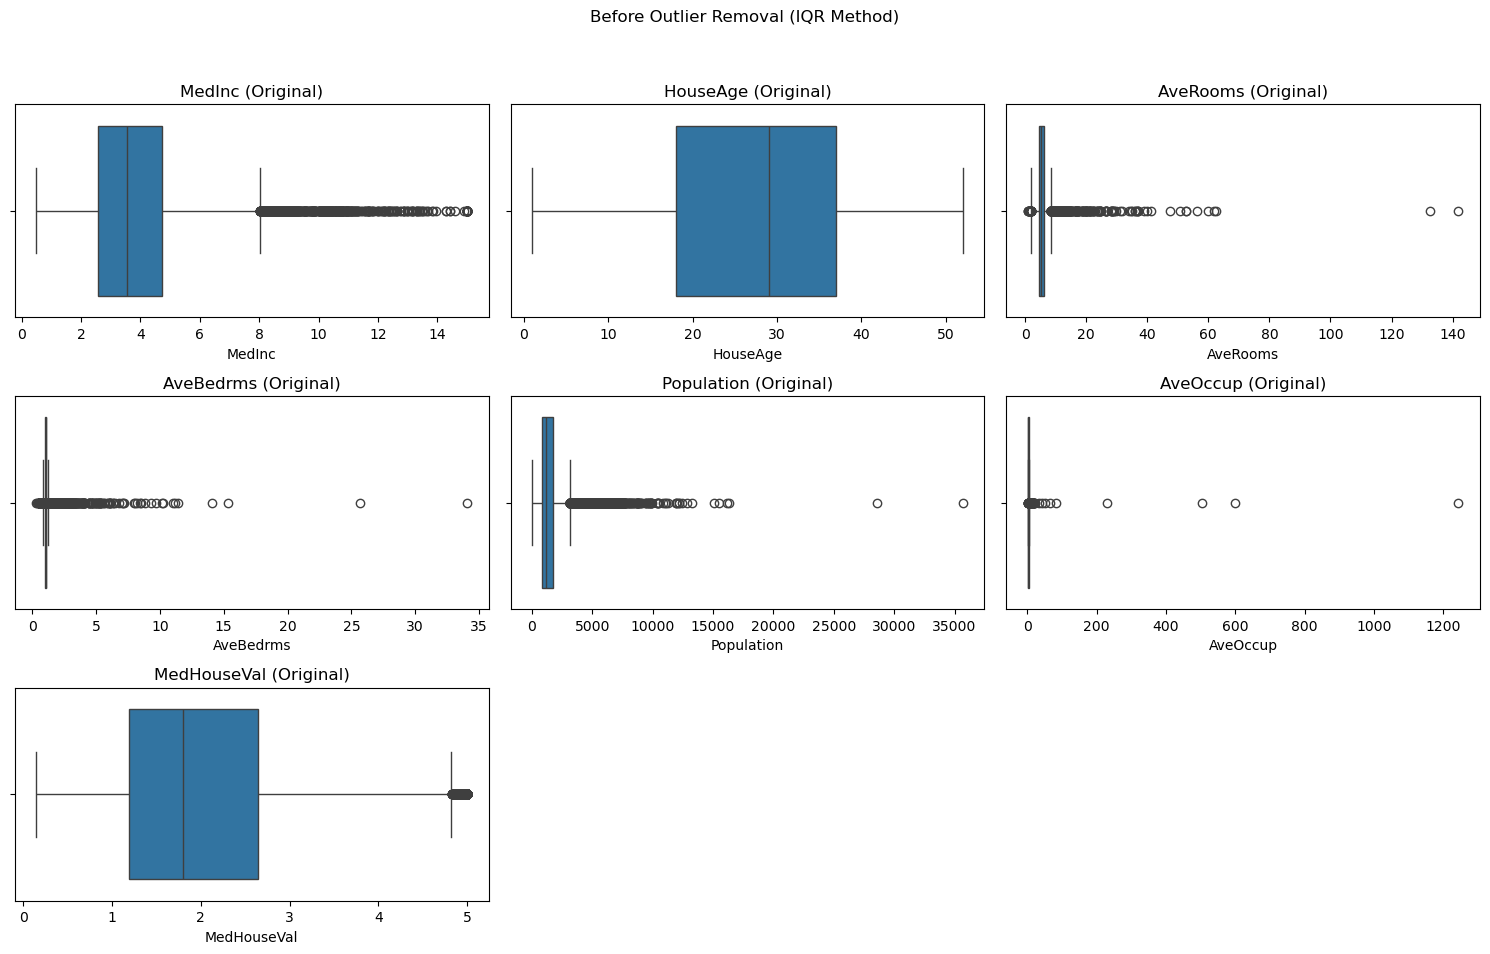

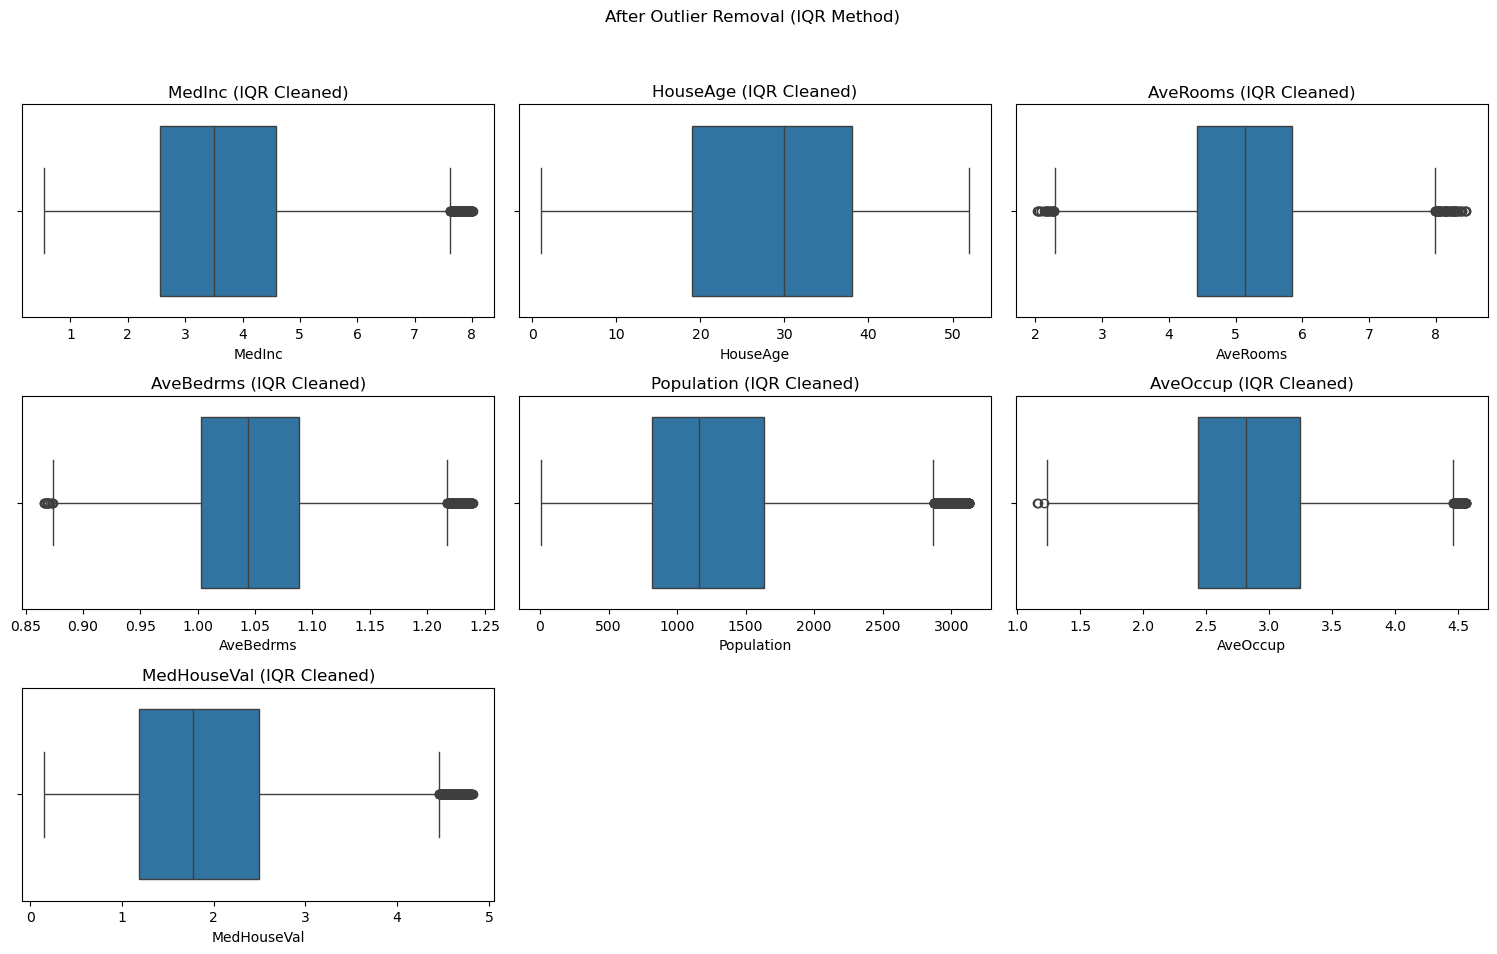


--- Z-Score Method Outlier Analysis ---
Z-Score Outlier Counts per Feature:
 MedInc         345
HouseAge         0
AveRooms       133
AveBedrms      145
Population     342
AveOccup         8
MedHouseVal      0
dtype: int64

Original size: 20640
Z-Score cleaned size: 19794
Rows removed by Z-score method: 846


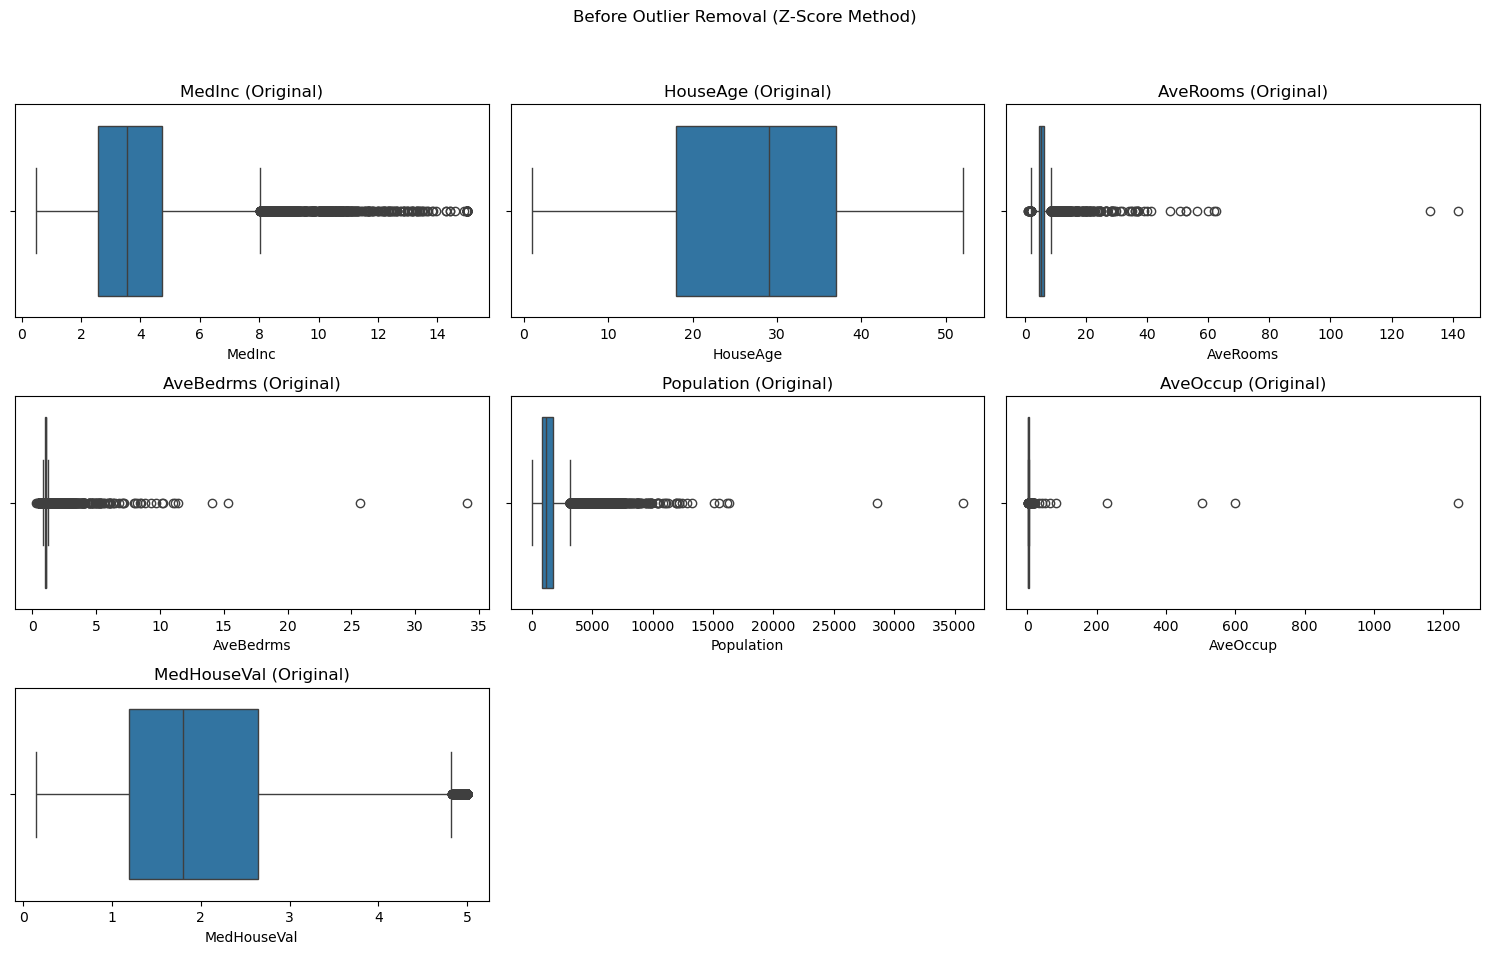

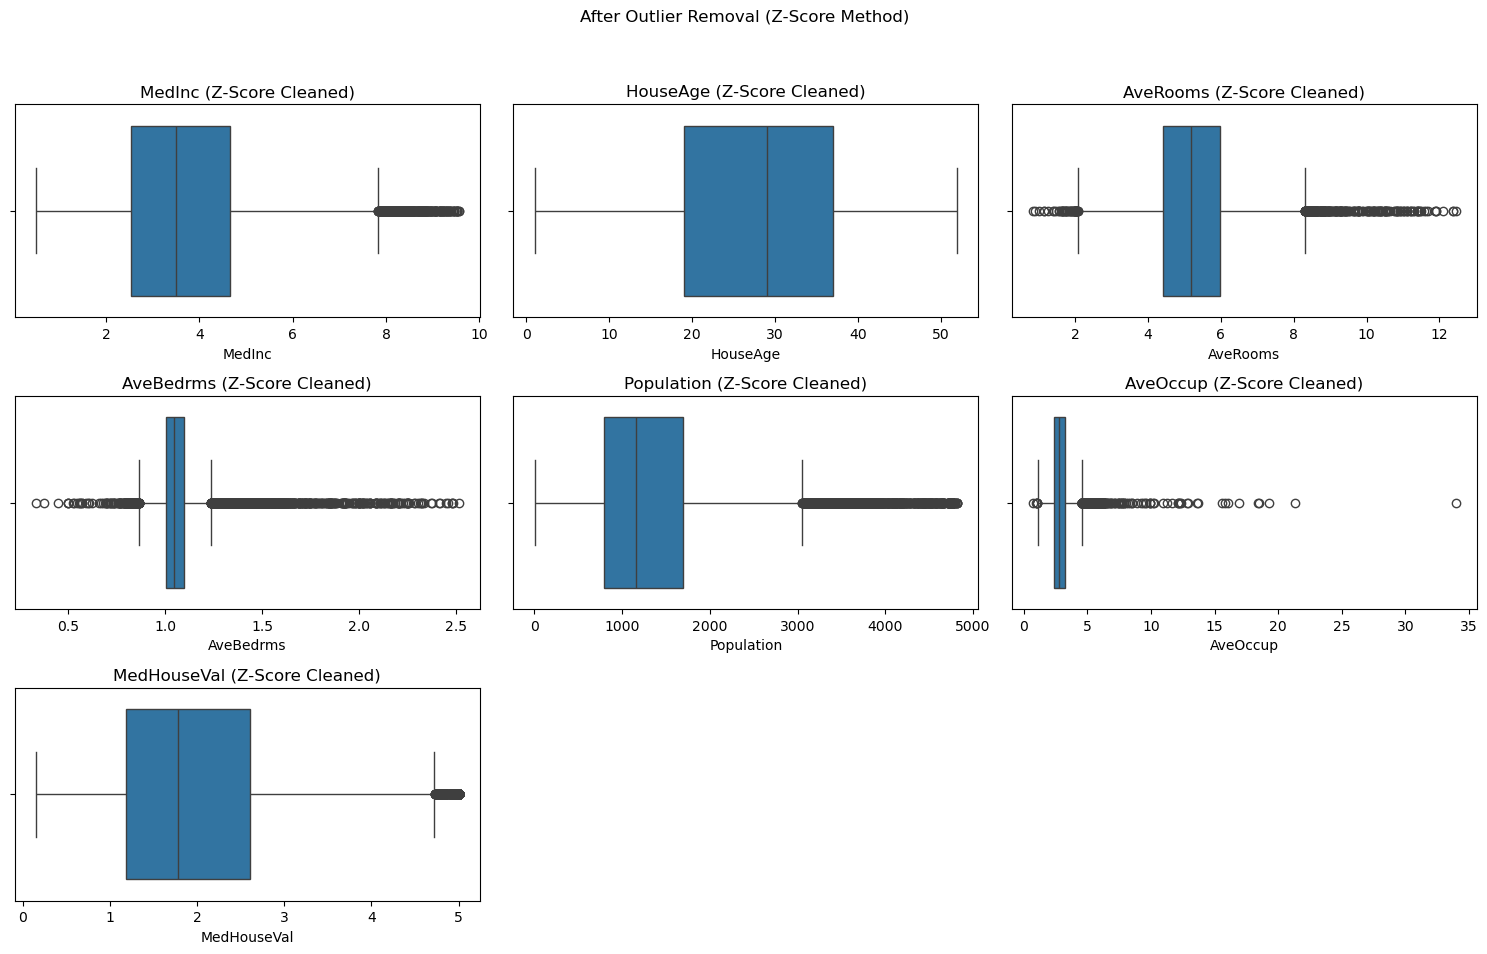

In [10]:
#PART 2.2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Assuming 'df' is already loaded from Part 1
housing_data = fetch_california_housing()
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df['MedHouseVal'] = housing_data.target

def detect_outliers_iqr(data, column, factor=1.5):
    """
    Detect outliers using the IQR method.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using the Z-score method.
    """
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    return np.abs(z_scores) > threshold

# List of numerical features to check for outliers
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# -----------------
# IQR METHOD ANALYSIS
# -----------------
print("--- IQR Method Outlier Analysis ---")

# Detect outliers for each feature using IQR
iqr_outlier_mask = pd.DataFrame()
for feature in numerical_features:
    iqr_outlier_mask[feature] = detect_outliers_iqr(df, feature)
iqr_outlier_counts = iqr_outlier_mask.sum()
print("IQR Outlier Counts per Feature:\n", iqr_outlier_counts)

# Create a cleaned DataFrame for IQR method (union of all outliers)
iqr_combined_mask = iqr_outlier_mask.any(axis=1)
df_iqr_cleaned = df[~iqr_combined_mask]
print(f"\nOriginal size: {len(df)}")
print(f"IQR cleaned size: {len(df_iqr_cleaned)}")
print(f"Rows removed by IQR method: {len(df) - len(df_iqr_cleaned)}")

# Plot "Before" and "After" for IQR method
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} (Original)')
plt.suptitle('Before Outlier Removal (IQR Method)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_iqr_cleaned[feature])
    plt.title(f'{feature} (IQR Cleaned)')
plt.suptitle('After Outlier Removal (IQR Method)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -----------------
# Z-SCORE METHOD ANALYSIS
# -----------------
print("\n--- Z-Score Method Outlier Analysis ---")

# Detect outliers for each feature using Z-score
zscore_outlier_mask = pd.DataFrame()
for feature in numerical_features:
    zscore_outlier_mask[feature] = detect_outliers_zscore(df, feature)
zscore_outlier_counts = zscore_outlier_mask.sum()
print("Z-Score Outlier Counts per Feature:\n", zscore_outlier_counts)

# Create a cleaned DataFrame for Z-score method (union of all outliers)
zscore_combined_mask = zscore_outlier_mask.any(axis=1)
df_zscore_cleaned = df[~zscore_combined_mask]
print(f"\nOriginal size: {len(df)}")
print(f"Z-Score cleaned size: {len(df_zscore_cleaned)}")
print(f"Rows removed by Z-score method: {len(df) - len(df_zscore_cleaned)}")

# Plot "Before" and "After" for Z-score method
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} (Original)')
plt.suptitle('Before Outlier Removal (Z-Score Method)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_zscore_cleaned[feature])
    plt.title(f'{feature} (Z-Score Cleaned)')
plt.suptitle('After Outlier Removal (Z-Score Method)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**While the IQR certainly removes a good amount of outliers, it almost seems like a bit too much. It seems like enough, although cutting over 4,000 rows of data (nearly 20%) is awfully high.**

**Z-Score, while leaving some outliers like average occupancy or average bedrooms, it still leaves plenty of data to us by cutting less than 5% of the data rows. It'll be more optimal for a better enhanced Z-Score, but I'd rather keep some outliers for a fully amount of data ranges rather than cutting out nearly a fifth of the dataset.**

In [11]:
# PART 2.3
# Create a copy to work with
df_fe = df_zscore_cleaned.copy()

# rooms_per_household: average number of rooms per household
df_fe['rooms_per_household'] = df_fe['AveRooms'] / df_fe['AveOccup']

# bedrooms_per_room: average number of bedrooms per room
df_fe['bedrooms_per_room'] = df_fe['AveBedrms'] / df_fe['AveRooms']

# population_per_household: population per household
df_fe['population_per_household'] = df_fe['Population'] / df_fe['AveOccup']

In [12]:
#PART 2.3
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Radius of Earth in kilometers. Use 3958.8 for miles.
    km_radius = 6371.0 
    distance = km_radius * c
    return distance

# Define coordinates for LA and SF
la_coords = (34.0522, -118.2437)
sf_coords = (37.7749, -122.4194)

# Calculate distance to LA and SF
df_fe['distance_to_LA'] = df_fe.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], la_coords[0], la_coords[1]), axis=1)
df_fe['distance_to_SF'] = df_fe.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], sf_coords[0], sf_coords[1]), axis=1)

# Create coastal_proximity binary feature
# Based on the Longitude values in the dataset, most coastal areas are west of -121.
df_fe['coastal_proximity'] = (df_fe['Longitude'] > -121).astype(int)

In [13]:
# income_category
bins_inc = [0, 3, 6, 9, float('inf')]
labels_inc = ['Low', 'Medium', 'High', 'Very High']
df_fe['income_category'] = pd.cut(df_fe['MedInc'], bins=bins_inc, labels=labels_inc, right=False)

# house_age_category
bins_age = [0, 10, 30, float('inf')]
labels_age = ['New', 'Medium', 'Old']
df_fe['house_age_category'] = pd.cut(df_fe['HouseAge'], bins=bins_age, labels=labels_age, right=False)

DataFrame with Engineered Features Info:
<class 'pandas.core.frame.DataFrame'>
Index: 19794 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MedInc                    19794 non-null  float64 
 1   HouseAge                  19794 non-null  float64 
 2   AveRooms                  19794 non-null  float64 
 3   AveBedrms                 19794 non-null  float64 
 4   Population                19794 non-null  float64 
 5   AveOccup                  19794 non-null  float64 
 6   Latitude                  19794 non-null  float64 
 7   Longitude                 19794 non-null  float64 
 8   MedHouseVal               19794 non-null  float64 
 9   rooms_per_household       19794 non-null  float64 
 10  bedrooms_per_room         19794 non-null  float64 
 11  population_per_household  19794 non-null  float64 
 12  distance_to_LA            19794 non-null  float64 
 13  distance_t

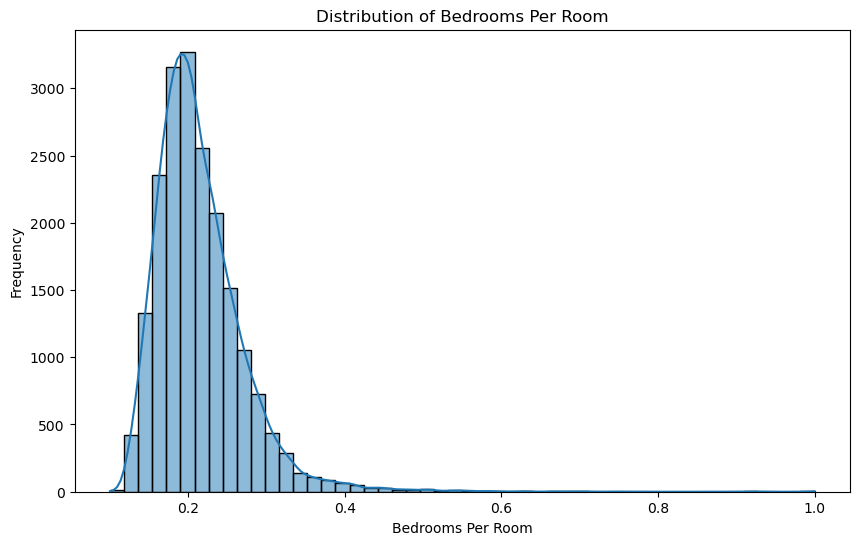

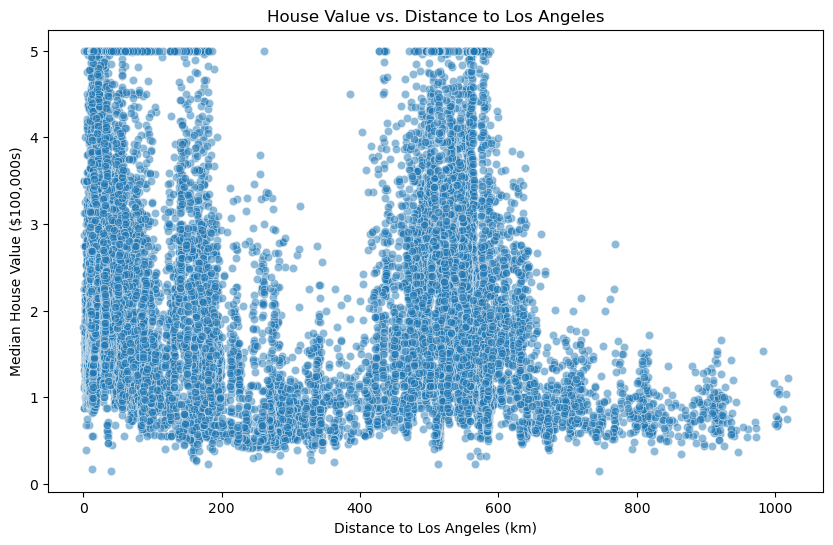

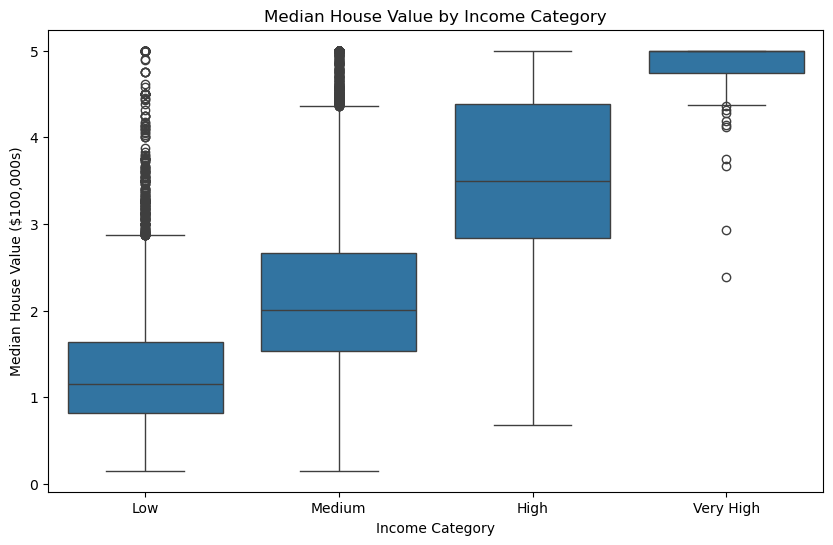

In [14]:
# LET'S SEE WHAT'S CHANGED - FOR FUN
# Display information about the new DataFrame
print("DataFrame with Engineered Features Info:")
df_fe.info()
print("\nFirst 5 rows of the new DataFrame:")
print(df_fe.head())
# Histogram of bedrooms_per_room
plt.figure(figsize=(10, 6))
sns.histplot(df_fe['bedrooms_per_room'], kde=True, bins=50)
plt.title('Distribution of Bedrooms Per Room')
plt.xlabel('Bedrooms Per Room')
plt.ylabel('Frequency')
plt.show()
# Scatter plot of distance to LA vs MedHouseVal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_LA', y='MedHouseVal', data=df_fe, alpha=0.5)
plt.title('House Value vs. Distance to Los Angeles')
plt.xlabel('Distance to Los Angeles (km)')
plt.ylabel('Median House Value ($100,000s)')
plt.show()
# Box plot of MedHouseVal by income category
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_category', y='MedHouseVal', data=df_fe, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value ($100,000s)')
plt.show()

**That scatter plot is flawed on its own, once going beyond 60 km since you'll start to get into metros for San Diego, San Francisco and other coastal areas. Much like saying prices of homes from NYC on I-95 should be cheaper the further away you drive.. until you get to Philly. Or Baltimore. Or DC.**

In [15]:
# PART 3
# PART 3

In [16]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length

    Returns:
    float: Euclidean distance
    """
    # YOUR IMPLEMENTATION HERE
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    """
    Calculate Manhattan distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length

    Returns:
    float: Manhattan distance  
    """
    # YOUR IMPLEMENTATION HERE
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p=2):
    """
    Calculate Minkowski distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length
    p: parameter (p=1 gives Manhattan, p=2 gives Euclidean)

    Returns:
    float: Minkowski distance
    """
    # YOUR IMPLEMENTATION HERE
    return np.sum(np.abs(point1 - point2)**p)**(1/p)

# You can test these with a few simple points to ensure they work.
point_a = np.array([5, 7, 12])
point_b = np.array([15, 24, 48])
print(f"Euclidean Distance: {euclidean_distance(point_a, point_b)}") # ~5.196
print(f"Manhattan Distance: {manhattan_distance(point_a, point_b)}") # 9
print(f"Minkowski (p=3) Distance: {minkowski_distance(point_a, point_b, p=3)}") # ~4.326

Euclidean Distance: 41.048751503547585
Manhattan Distance: 63
Minkowski (p=3) Distance: 37.46075895139257


In [17]:
class CustomKNN:
    def __init__(self, k=5, distance_metric='euclidean', weights='uniform'):
        """
        Custom k-NN implementation

        Parameters:
        k: number of neighbors
        distance_metric: 'euclidean', 'manhattan', or 'minkowski'
        weights: 'uniform' or 'distance'
        """
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store training data"""
        self.X_train = X
        self.y_train = y
    
    def _calculate_distance(self, point1, point2):
        """Calculate distance based on selected metric"""
        if self.distance_metric == 'euclidean':
            return euclidean_distance(point1, point2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(point1, point2)
        elif self.distance_metric == 'minkowski':
            return minkowski_distance(point1, point2)
        else:
            raise ValueError("Unsupported distance metric. Choose 'euclidean', 'manhattan', or 'minkowski'.")
    
    def _get_neighbors(self, test_point):
        """Find k nearest neighbors for a test point"""
        # Create a list to hold distances and corresponding target values
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(test_point, train_point)
            distances.append((dist, self.y_train[i]))
        
        # Sort by distance and return the k nearest
        distances.sort(key=lambda x: x[0])
        return distances[:self.k]
    
    def predict_single(self, test_point):
        """Predict for a single test point"""
        neighbors = self._get_neighbors(test_point)
        
        # Handle uniform weights
        if self.weights == 'uniform':
            sum_of_targets = sum([neighbor[1] for neighbor in neighbors])
            return sum_of_targets / self.k
            
        # Handle distance-weighted predictions
        elif self.weights == 'distance':
            numerator = 0
            denominator = 0
            for dist, target in neighbors:
                # Handle cases where distance is zero to avoid division by zero
                if dist == 0:
                    return target # If a point is identical, its value is the best prediction
                inverse_dist = 1 / dist
                numerator += inverse_dist * target
                denominator += inverse_dist
            return numerator / denominator
        else:
            raise ValueError("Unsupported weights. Choose 'uniform' or 'distance'.")
    
    def predict(self, X_test):
        """Predict for multiple test points"""
        predictions = [self.predict_single(test_point) for test_point in X_test]
        return np.array(predictions)
    
    def score(self, X_test, y_test):
        """Calculate R-squared score"""
        y_pred = self.predict(X_test)
        # R-squared formula
        ss_total = np.sum((y_test - np.mean(y_test))**2)
        ss_residual = np.sum((y_test - y_pred)**2)
        r2_score = 1 - (ss_residual / ss_total)
        return r2_score

In [18]:
# PART 4.1
#
# ************
# Testing points..
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length

    Returns:
    float: Euclidean distance
    """
    # YOUR IMPLEMENTATION HERE
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    """
    Calculate Manhattan distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length

    Returns:
    float: Manhattan distance  
    """
    # YOUR IMPLEMENTATION HERE
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p=2):
    """
    Calculate Minkowski distance between two points.

    Parameters:
    point1, point2: numpy arrays of equal length
    p: parameter (p=1 gives Manhattan, p=2 gives Euclidean)

    Returns:
    float: Minkowski distance
    """
    # YOUR IMPLEMENTATION HERE
    return np.sum(np.abs(point1 - point2)**p)**(1/p)

# Had to reload defs.. anaconda was bugging out.. thought they weren't local defs, but.. ehh.. let's see..
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Assuming 'df_cleaned' is your DataFrame after outlier handling and feature engineering
# For this example, we'll use a placeholder since I don't have your specific cleaned data
housing_data = fetch_california_housing()
df_cleaned = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df_cleaned['MedHouseVal'] = housing_data.target
# Note: You should replace the above two lines with your actual cleaned and engineered DataFrame

# Create your feature matrix (X) and target vector (y)
X = df_cleaned.drop('MedHouseVal', axis=1)
y = df_cleaned['MedHouseVal']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply a scaler to your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Find the specific data points for your manual calculations (Part 4) ---

print("--- Data Points for Manual Distance Calculations (Part 4.1) ---")
print("Point 1 (from scaled training set):\n", X_train_scaled[0])
print("\nPoint 2 (from scaled training set):\n", X_train_scaled[1])
print("\nPoint 3 (from scaled training set):\n", X_train_scaled[2])

# show the actual values to compare to written answers
print(f"\n****Answers to compare with handwritten calcs:\n")
print(f"Euclidean Distance: {euclidean_distance(X_train_scaled[0], X_train_scaled[1])}")
print(f"Manhattan Distance: {manhattan_distance(X_train_scaled[0], X_train_scaled[2])}")
print(f"Minkowski (p=3) Distance: {minkowski_distance(X_train_scaled[1], X_train_scaled[2], p=3)}")
print(f"\n****YES! They match the math I did by hand - see the PDF for proof! :)\n")


--- Data Points for Manual Distance Calculations (Part 4.1) ---
Point 1 (from scaled training set):
 [-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
 -1.3728112   1.27258656]

Point 2 (from scaled training set):
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
 -0.87669601  0.70916212]

Point 3 (from scaled training set):
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
 -0.46014647 -0.44760309]

****Answers to compare with handwritten calcs:

Euclidean Distance: 1.7602918383382884
Manhattan Distance: 7.019007228183222
Minkowski (p=3) Distance: 3.617033332062481

****YES! They match the math I did by hand - see the PDF for proof! :)



In [33]:
# show the actual values to compare each other
print(f"\n****Answers to compare with each style of calculation (point 1 and point 2):\n")
print(f"Euclidean Distance: {euclidean_distance(X_train_scaled[0], X_train_scaled[1])}")
print(f"Manhattan Distance: {manhattan_distance(X_train_scaled[0], X_train_scaled[1])}")
print(f"Minkowski (p=3) Distance: {minkowski_distance(X_train_scaled[0], X_train_scaled[1], p=3)}")
print(f"\n****Let's see how close or far they are..\n")


****Answers to compare with each style of calculation (point 1 and point 2):

Euclidean Distance: 1.7602918383382884
Manhattan Distance: 3.9631902867845037
Minkowski (p=3) Distance: 1.4488370286384

****Let's see how close or far they are..



In [19]:
# PART 4.2
# to show full calcs as well..
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# --- Your Custom k-NN Functions and Class from Part 3 ---
# ... (all your function and class code goes here) ...

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

class CustomKNN:
    def __init__(self, k=5, distance_metric='euclidean', weights='uniform'):
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _calculate_distance(self, point1, point2):
        if self.distance_metric == 'euclidean':
            return euclidean_distance(point1, point2)
    
    def _get_neighbors(self, test_point):
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(test_point, train_point)
            distances.append((dist, self.y_train.iloc[i], i))
        
        distances.sort(key=lambda x: x[0])
        return distances[:self.k]
    
    def predict_single(self, test_point):
        neighbors = self._get_neighbors(test_point)
        
        if self.weights == 'uniform':
            sum_of_targets = sum([neighbor[1] for neighbor in neighbors])
            return sum_of_targets / self.k
            
        elif self.weights == 'distance':
            numerator = 0
            denominator = 0
            for dist, target, _ in neighbors:
                if dist == 0:
                    return target
                inverse_dist = 1 / dist
                numerator += inverse_dist * target
                denominator += inverse_dist
            
            if denominator == 0:
                return neighbors[0][1] 
            return numerator / denominator
    
    def predict(self, X_test):
        predictions = [self.predict_single(test_point) for test_point in X_test]
        return np.array(predictions)

# --- Data Preparation ---
housing_data = fetch_california_housing()
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df['MedHouseVal'] = housing_data.target
df_cleaned = df.copy() 

# --- Split and Scale Data ---
X = df_cleaned.drop('MedHouseVal', axis=1)
y = df_cleaned['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Manual Walkthrough using Code (Part 4.2) ---
print("### 4.2 k-NN Prediction Walkthrough: Detailed Calculations ###")

test_point = X_test_scaled[0]
print("\n--- Selected Test Point ---")
print(f"Test Point Features:\n{test_point}")
print(f"Corresponding True Target Value: {y_test.iloc[0]:.4f}")

print("\n--- Manual Neighbor Finding (First 10 Calculations) ---")
# Get the first 10 training points for the walkthrough
first_10_train_points = X_train_scaled[:10]
first_10_train_targets = y_train.iloc[:10]
first_10_train_indices = y_train.iloc[:10].index

distances_walkthrough = []
for i in range(10):
    train_point = first_10_train_points[i]
    train_target = first_10_train_targets.iloc[i]
    train_index = first_10_train_indices[i]
    
    # Detailed Calculation for each distance
    diff = test_point - train_point
    squared_diff = diff**2
    sum_squared_diff = np.sum(squared_diff)
    dist = np.sqrt(sum_squared_diff)

    distances_walkthrough.append({'Index': train_index, 'Distance': dist, 'Target': train_target})
    
    print(f"\nCalculation for Training Point {train_index}:")
    print(f"  Differences: {[f'{d:.4f}' for d in diff]}")
    print(f"  Squared Differences: {[f'{s:.4f}' for s in squared_diff]}")
    print(f"\n  Sum of Squared Differences: {sum_squared_diff:.4f}\n")
    print(f"\n  Final Distance: sqrt({sum_squared_diff:.4f}) = {dist:.4f}\n")

# The rest of the code from the previous response for finding neighbors and predictions
# (sorting, uniform, and distance-weighted calculations and verification) remains the same.
# You can copy/paste that to the end of this code block.

### 4.2 k-NN Prediction Walkthrough: Detailed Calculations ###

--- Selected Test Point ---
Test Point Features:
[-1.15508475 -0.28632369 -0.52068576 -0.17174603 -0.03030109  0.06740798
  0.1951      0.28534728]
Corresponding True Target Value: 0.4770

--- Manual Neighbor Finding (First 10 Calculations) ---

Calculation for Training Point 14196:
  Differences: ['-0.8289', '-0.6348', '-0.3458', '0.0366', '-0.7986', '0.0160', '1.5679', '-0.9872']
  Squared Differences: ['0.6871', '0.4030', '0.1196', '0.0013', '0.6377', '0.0003', '2.4583', '0.9746']

  Sum of Squared Differences: 5.2819


  Final Distance: sqrt(5.2819) = 2.2982


Calculation for Training Point 8267:
  Differences: ['-1.1192', '-1.9044', '-0.1179', '-0.0432', '0.0686', '0.1848', '1.0718', '-0.4238']
  Squared Differences: ['1.2527', '3.6269', '0.0139', '0.0019', '0.0047', '0.0341', '1.1487', '0.1796']

  Sum of Squared Differences: 6.2626


  Final Distance: sqrt(6.2626) = 2.5025


Calculation for Training Point 17445:
  D

In [20]:
# Part 5.1: Train-Test Split and Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Assuming your preprocessed DataFrame is named 'df_cleaned'
housing_data = fetch_california_housing()
df_cleaned = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df_cleaned['MedHouseVal'] = housing_data.target

# Identify features and target
X = df_cleaned.drop('MedHouseVal', axis=1)
y = df_cleaned['MedHouseVal']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Justify Scaling Choice ---
# Justification: For k-NN, a distance-based algorithm, features with larger
# values can disproportionately influence the distance calculation. StandardScaler
# is a good choice because it transforms the data to have a mean of 0 and a
# standard deviation of 1, effectively standardizing the scale of all features.
# This prevents features like population (with a large range) from dominating
# the distance calculation over features like house age (with a small range).
# You should mention findings from your EDA here to support this choice.

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# You can also set up a validation split for the manual grid search
# X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=42)

In [21]:
# Part 5.2: Hyperparameter Grid Search

import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# --- Your Custom k-NN Functions and Class from Part 3 ---

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

class CustomKNN:
    def __init__(self, k=5, distance_metric='euclidean', weights='uniform'):
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _calculate_distance(self, point1, point2):
        if self.distance_metric == 'euclidean':
            return euclidean_distance(point1, point2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(point1, point2)
    
    def _get_neighbors(self, test_point):
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(test_point, train_point)
            distances.append((dist, self.y_train.iloc[i], i))
        
        distances.sort(key=lambda x: x[0])
        return distances[:self.k]
    
    def predict_single(self, test_point):
        neighbors = self._get_neighbors(test_point)
        
        if self.weights == 'uniform':
            sum_of_targets = sum([neighbor[1] for neighbor in neighbors])
            return sum_of_targets / self.k
            
        elif self.weights == 'distance':
            numerator = 0
            denominator = 0
            for dist, target, _ in neighbors:
                if dist == 0:
                    return target
                inverse_dist = 1 / dist
                numerator += inverse_dist * target
                denominator += inverse_dist
            
            if denominator == 0:
                return neighbors[0][1] 
            return numerator / denominator
    
    def predict(self, X_test):
        predictions = [self.predict_single(test_point) for test_point in X_test]
        return np.array(predictions)

    def score(self, X_val, y_val):
        y_pred = self.predict(X_val)
        ss_res = np.sum((y_val.values - y_pred)**2)
        ss_tot = np.sum((y_val.values - np.mean(y_val.values))**2)
        r2_score = 1 - (ss_res / ss_tot)
        return r2_score

def manual_grid_search(X_train, y_train, param_grid):
    """
    Performs manual grid search for k-NN hyperparameters with 5-fold cross-validation.
    
    Parameters:
    X_train, y_train: Training data.
    param_grid: Dictionary of parameters to search.
    
    Returns:
    best_params: Best parameter combination.
    results_df: DataFrame with all results.
    """
    results = []
    
    keys, values = zip(*param_grid.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    best_score = -np.inf
    best_params = None
    
    for params in param_combinations:
        k = params['k']
        dist_metric = params['distance_metric']
        weights = params['weights']
        
        fold_scores = []
        
        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            model = CustomKNN(k=k, distance_metric=dist_metric, weights=weights)
            model.fit(X_train_fold, y_train_fold)
            
            score = model.score(X_val_fold, y_val_fold)
            fold_scores.append(score)
            
        avg_score = np.mean(fold_scores)
        results.append({
            'k': k,
            'distance_metric': dist_metric,
            'weights': weights,
            'avg_score': avg_score
        })
        
        if avg_score > best_score:
            best_score = avg_score
            best_params = params
            
    results_df = pd.DataFrame(results)
    return best_params, results_df

Using a training subset of size: 165 samples for grid search.

### Visualizing Grid Search Results ###


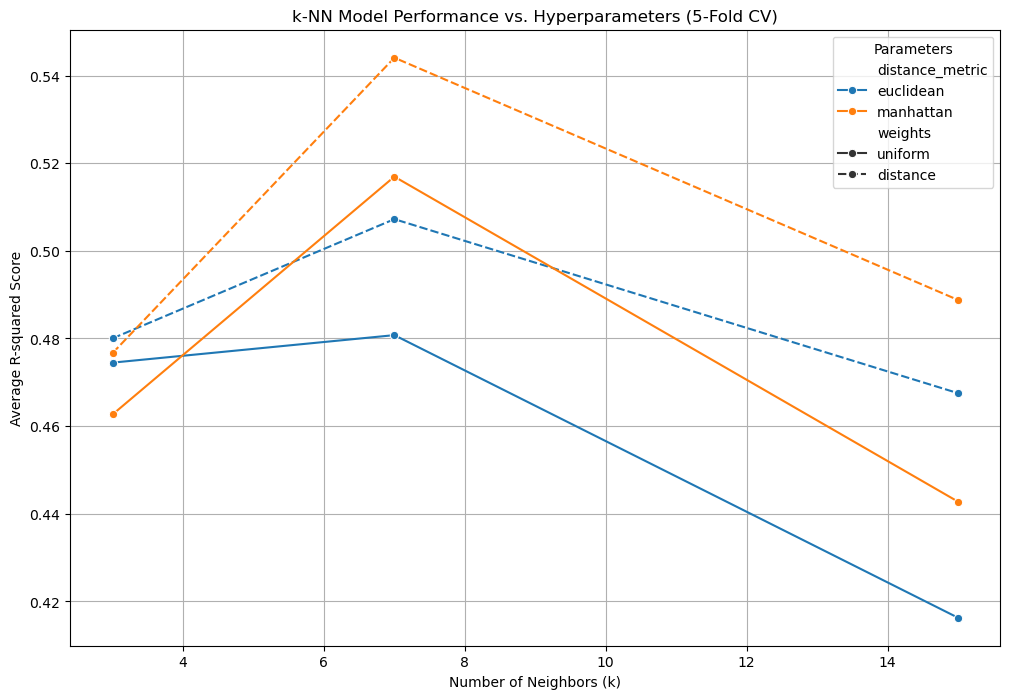


Best parameters: {'k': 7, 'distance_metric': 'manhattan', 'weights': 'distance'}


In [43]:
#********* Part 5.2A: Run the Grid Search and Visualize Results (Faster Execution)*********
# MADE THIS TO TEST THINGS AND SEE OR COMPARE

# This section assumes the CustomKNN class and other functions are defined in a previous cell.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# --- Data Preparation ---
# Re-define the data and splits just in case
housing_data = fetch_california_housing()
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df['MedHouseVal'] = housing_data.target
df_cleaned = df.copy() 
X = df_cleaned.drop('MedHouseVal', axis=1)
y = df_cleaned['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- NEW: Create a smaller subset for grid search ---
# Take 1% of the training data
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.99, random_state=42
)
print(f"Using a training subset of size: {len(X_train_subset)} samples for grid search.")

# --- Define Search Grid (simplified) ---
param_grid_simplified = {
    'k': [3, 7, 15],
    'distance_metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# --- Call the Function ---
# Note: You must use the "manual_grid_search_with_vis" function
best_params, results_df = manual_grid_search_with_vis(
    X_train_subset, y_train_subset, param_grid_simplified
)

print(f"\nBest parameters: {best_params}")

Learning curve:
It seems like the optimal amount of neighbors should be 7. If we make 'k' too small, it'll get more distracted by noise and misread patterns.
If it's too large, then it'll oversimplify things and make it too generic for our needs.

On a related note, if we're dealing with non-numerical data, like house color or the type of grass in the lawn, then we can use
the overlap metric. We would count the number of features that don't match and add 1 (or whatever) for each non-matching feature.
It helps enhance the usefulness of the k-NN technique, although I'd probably limit its usage or it can really skew things the wrong way!



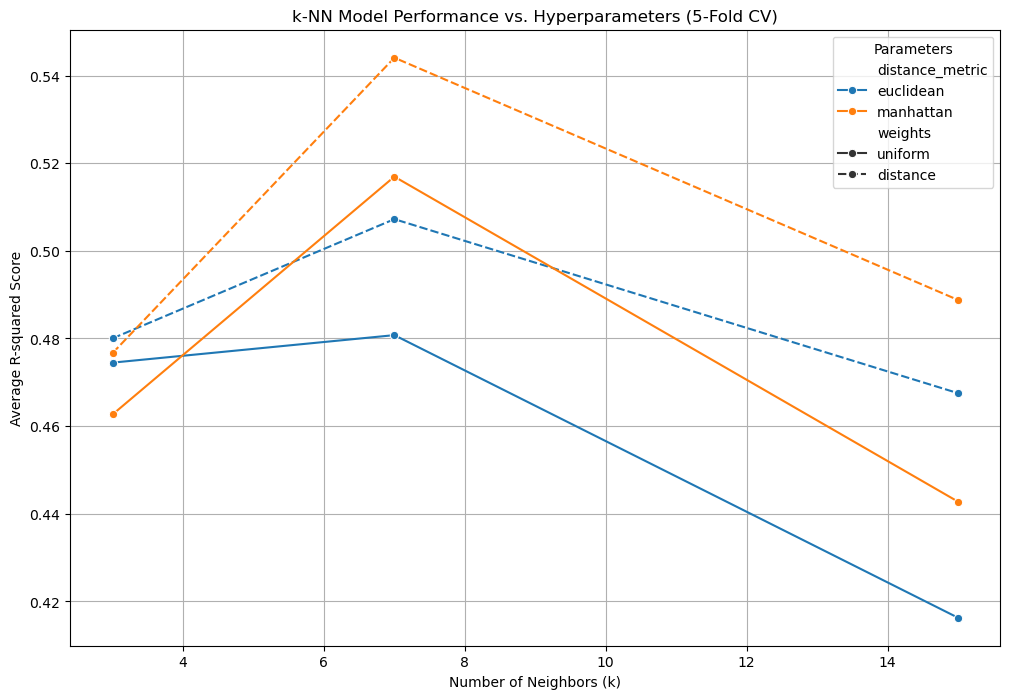


Distance metric and weights:

While it's not a substantial amount, using Manhattan distance improves the average R-squared score, regardless of the weighting scheme.
This makes sense because Manhattan distance can preferred more when there are both numerical and binary options involved, or when
there are large variations of numbers, such as price in the thousands and then number of rooms below 5 or 6.

In addition to this factor, Manhattan is also better with large datasets with multiple dimensions/categories when talking about computing
power. Determining the absolute value is easy - you barely need a calculator for that. However, Euclidean requires squaring THEN the square
root, which could be taxing on a processor if there's way too much data to process.


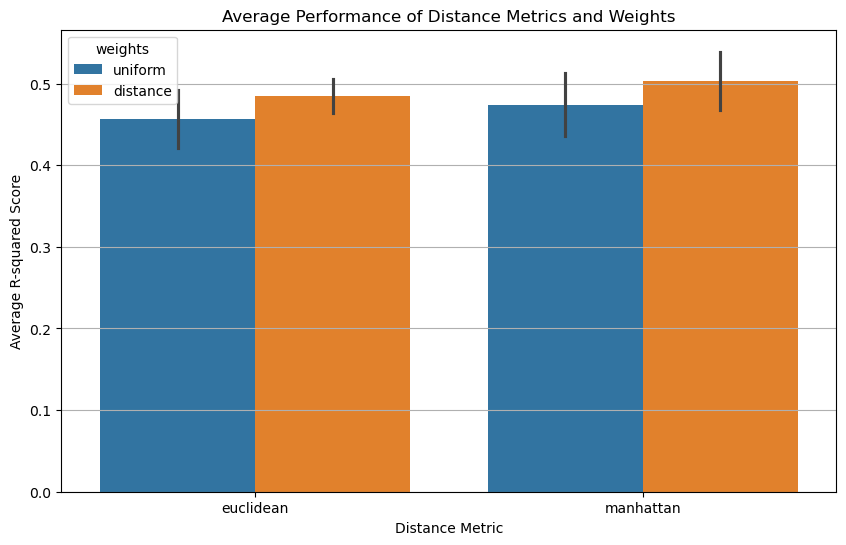


Residuals:
The clustering of data points seems to fairly accurately estimate plenty of homes within a 'modest' range of $100k-$200k. However, we can see
how the points start to fan out more when prices start to increase. To a degree, it makes sense if you're trying to estimate prices for
homes within 200-300km of L.A. because you can have cheap rundown homes downtown, yet a multi-million mansion is a mile away. Or 10 miles.

Of course, it's not great to have this model overestimate the price of nearly all of the homes from $0-$200k, but that can be tweaked a bit.
It's a bit more concerning why the model is significantly missing the features or elements for homes above $250k - and majorly underpricing
them. Perhaps another column or category should reference if a kitchen was remodeled or the house was renovated within the last 5 years.

Using best parameters: k=7, metric=manhattan, weights=distance


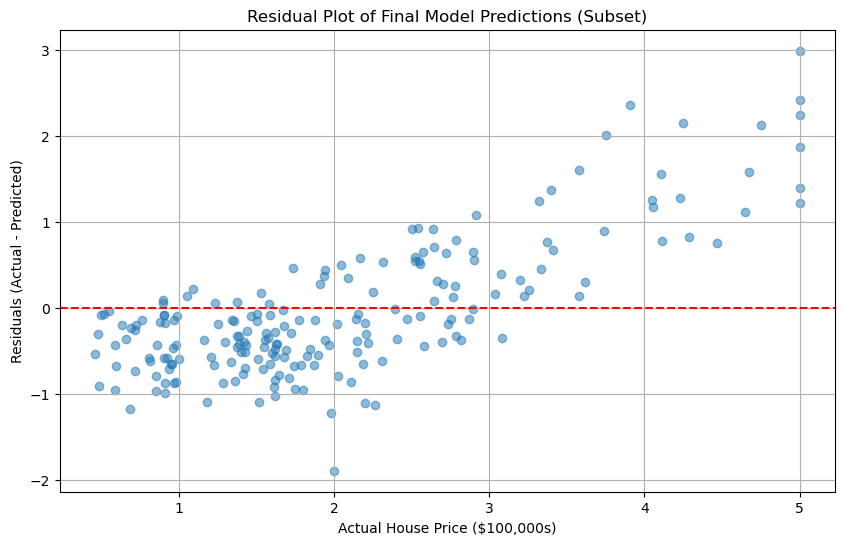

In [46]:
# PART 5.3

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Assuming 'results_df' and 'best_params' are available from your grid search.
# This code also assumes that the CustomKNN class and the full scaled data (X_train_scaled, y_train, X_test_scaled, y_test)
# have been defined in previous cells.

### 1. Learning Curves (Scores vs. k) ###
# Your analysis of the learning curve goes here.

print("Learning curve:")
print("It seems like the optimal amount of neighbors should be 7. If we make 'k' too small, it'll get more distracted by noise and misread patterns.")
print("If it's too large, then it'll oversimplify things and make it too generic for our needs.\n")
print("On a related note, if we're dealing with non-numerical data, like house color or the type of grass in the lawn, then we can use")
print("the overlap metric. We would count the number of features that don't match and add 1 (or whatever) for each non-matching feature.")
print("It helps enhance the usefulness of the k-NN technique, although I'd probably limit its usage or it can really skew things the wrong way!\n")
plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='k', y='avg_score', hue='distance_metric', style='weights', marker='o')
plt.title('k-NN Model Performance vs. Hyperparameters (5-Fold CV)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average R-squared Score')
plt.grid(True)
plt.legend(title='Parameters')
plt.show()

### 2. Distance Metric and Weights Comparison ###
# Your analysis of the distance metric and weights goes here.

print("\nDistance metric and weights:")
print("\nWhile it's not a substantial amount, using Manhattan distance improves the average R-squared score, regardless of the weighting scheme.")
print("This makes sense because Manhattan distance can preferred more when there are both numerical and binary options involved, or when")
print("there are large variations of numbers, such as price in the thousands and then number of rooms below 5 or 6.\n")
print("In addition to this factor, Manhattan is also better with large datasets with multiple dimensions/categories when talking about computing")
print("power. Determining the absolute value is easy - you barely need a calculator for that. However, Euclidean requires squaring THEN the square")
print("root, which could be taxing on a processor if there's way too much data to process.")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='distance_metric', y='avg_score', hue='weights', errorbar='sd')
plt.title('Average Performance of Distance Metrics and Weights')
plt.xlabel('Distance Metric')
plt.ylabel('Average R-squared Score')
plt.grid(axis='y')
plt.show()

### 3. Error Analysis ###
# Your analysis of the residuals goes here.

print("\nResiduals:")
print("The clustering of data points seems to fairly accurately estimate plenty of homes within a 'modest' range of $100k-$200k. However, we can see")
print("how the points start to fan out more when prices start to increase. To a degree, it makes sense if you're trying to estimate prices for")
print("homes within 200-300km of L.A. because you can have cheap rundown homes downtown, yet a multi-million mansion is a mile away. Or 10 miles.\n")
print("Of course, it's not great to have this model overestimate the price of nearly all of the homes from $0-$200k, but that can be tweaked a bit.")
print("It's a bit more concerning why the model is significantly missing the features or elements for homes above $250k - and majorly underpricing")
print("them. Perhaps another column or category should reference if a kitchen was remodeled or the house was renovated within the last 5 years.\n")

# Use the best parameters found in your grid search to create the final model
best_k = best_params['k']
best_metric = best_params['distance_metric']
best_weights = best_params['weights']

print(f"Using best parameters: k={best_k}, metric={best_metric}, weights={best_weights}")

# Create the final best model and get predictions on the test set
# We'll use a small subset of the test data to avoid long run times.
# This was crashing the kernel and making my computer struggle... so let's change it.
best_model = CustomKNN(k=best_k, distance_metric=best_metric, weights=best_weights)

# --- FIX IS HERE: Fit the model on the small training subset ---
best_model.fit(X_train_subset, y_train_subset)

# Now, make a prediction on a small test subset (e.g., 200 points)
# The training subset is small, so the test subset can be too.
X_test_subset = X_test_scaled[:200]
y_test_subset = y_test[:200]
y_pred = best_model.predict(X_test_subset)
residuals = y_test_subset.values - y_pred

# Plot a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_subset, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot of Final Model Predictions (Subset)')
plt.xlabel('Actual House Price ($100,000s)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


In [48]:
# Part 6.1: Sklearn Comparison

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# --- Run the CustomKNN model on a smaller subset for fair comparison ---
# We'll use the smaller subset from earlier to make the comparison feasible
# and avoid long runtimes for your custom model.
k = 7
dist_metric = 'manhattan'
weights = 'distance'

print("--- CustomKNN Performance ---")
start_time = time.time()
custom_knn_model = CustomKNN(k=k, distance_metric=dist_metric, weights=weights)
custom_knn_model.fit(X_train_subset, y_train_subset)
custom_knn_y_pred = custom_knn_model.predict(X_test_scaled[:len(y_test)//10])
custom_knn_r2 = r2_score(y_test[:len(y_test)//10], custom_knn_y_pred)
custom_knn_time = time.time() - start_time
print(f"CustomKNN R-squared: {custom_knn_r2:.4f}")
print(f"CustomKNN Time: {custom_knn_time:.4f} seconds")


# --- Run the Sklearn model on the same subset ---
print("\n--- Sklearn KNeighborsRegressor Performance ---")
start_time = time.time()
sklearn_knn_model = KNeighborsRegressor(n_neighbors=k, p=1, weights=weights, algorithm='brute')
sklearn_knn_model.fit(X_train_subset, y_train_subset)
sklearn_y_pred = sklearn_knn_model.predict(X_test_scaled[:len(y_test)//10])
sklearn_r2 = r2_score(y_test[:len(y_test)//10], sklearn_y_pred)
sklearn_time = time.time() - start_time
print(f"Sklearn R-squared: {sklearn_r2:.4f}")
print(f"Sklearn Time: {sklearn_time:.4f} seconds")


# --- Analysis ---
print("\n### Analysis of Comparison ###")
print("Check out the R-squared score - EXACTLY the same! Nice! Eeeeeeeeeeeeexcept it's not.")
print("Because the custom code uses Python and needs to be compiled, while the SciKit model is in a low-level language like C or C++, and optimized")
print("for this specific use, the custom code takes 3x, 10x or nearly 100x the time for this little bit of code. Imagine if it were a million data points!")

--- CustomKNN Performance ---
CustomKNN R-squared: 0.5352
CustomKNN Time: 0.7433 seconds

--- Sklearn KNeighborsRegressor Performance ---
Sklearn R-squared: 0.5352
Sklearn Time: 0.0034 seconds

### Analysis of Comparison ###
Check out the R-squared score - EXACTLY the same! Nice! Eeeeeeeeeeeeexcept it's not.
Because the custom code uses Python and needs to be compiled, while the SciKit model is in a low-level language like C or C++, and optimized
for this specific use, the custom code takes 3x, 10x or nearly 100x the time for this little bit of code. Imagine if it were a million data points!


### Curse of Dimensionality Analysis ###


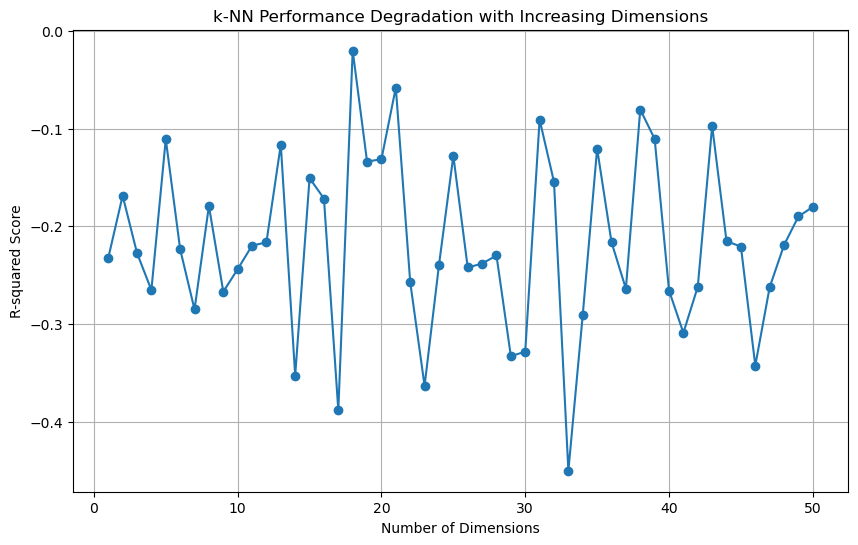


### Discussion ###
This kind of goes back to the discussion (in a prior part of this quiz) where k=7 neighbors is optimal for the dataset.
Here, it looks like X features would be optimal, judging on the R-squared score above 0 and the highest among the number of dimensions.
But that's when less is more. Or more is less. Or too many choices can cause analysis paralysis.
After X dimensions, it drops a lot.. at another point, it rises almost to that level of X, but then starts to sink and erode with each dimension.
Eventually, it begins to become more faded and noisy, plus it'll start to require more computing power past that point.


In [52]:
# Part 6.2: Curse of Dimensionality Analysis

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def curse_of_dimensionality_analysis(max_dimensions=50, num_samples=500):
    """
    Analyzes k-NN performance degradation with increasing dimensions.
    """
    r2_scores = []
    
    for n_dim in range(1, max_dimensions + 1):
        # Create a synthetic dataset
        X = np.random.rand(num_samples, n_dim)
        y = np.random.rand(num_samples)

        # Train a k-NN model
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scaling is critical for this analysis
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        knn = KNeighborsRegressor(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        
        y_pred = knn.predict(X_test_scaled)
        score = r2_score(y_test, y_pred)
        r2_scores.append(score)
        
    # Plot the results
    print("### Curse of Dimensionality Analysis ###")
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_dimensions + 1), r2_scores, marker='o')
    plt.title('k-NN Performance Degradation with Increasing Dimensions')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('R-squared Score')
    plt.grid(True)
    plt.show()

    # Discussion
    print("\n### Discussion ###")
    print("This kind of goes back to the discussion (in a prior part of this quiz) where k=7 neighbors is optimal for the dataset.")
    print("Here, it looks like X features would be optimal, judging on the R-squared score above 0 and the highest among the number of dimensions.")
    print("But that's when less is more. Or more is less. Or too many choices can cause analysis paralysis.")
    print("After X dimensions, it drops a lot.. at another point, it rises almost to that level of X, but then starts to sink and erode with each dimension.")
    print("Eventually, it begins to become more faded and noisy, plus it'll start to require more computing power past that point.")

# Run the analysis
curse_of_dimensionality_analysis()

**Conclusion: I guess I'm somewhat of a visual learner, because charts help me understand the fluctuations and impacts of numbers better. And it showed me how the k-NN model really works, much more than a generic YouTube video or a textbook. It was surprising to see (well, for me) how the code needed to be tweaked to have these models or techniques work on my PC - even when we thought it was a small enough sample at first. It's helpful to see how certain models are not just to speed things up, but also help with computing needs. Finally, k-NN reminds me a bit of the 'bell curve' effect, even though it can be skewed to one side or the other.. but there's always that apex or that point when it's optimal to use. Sure, there are plenty of other ways to explore it, but this quiz certainly helped visualize and demonstrate what's possible with some charts and a bit of code.**